In [171]:
pip install pandas-profiling

  Stored in directory: C:\Users\admin\AppData\Local\pip\Cache\wheels\b2\4b\40\ff4633a59f4e7fbdfec19b8e10e353b54b5eef125c31afe51a
  Stored in directory: C:\Users\admin\AppData\Local\pip\Cache\wheels\b0\b2\96\2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
  Stored in directory: C:\Users\admin\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built pandas-profiling confuse htmlmin
  Found existing installation: joblib 0.13.2
    Uninstalling joblib-0.13.2:
      Successfully uninstalled joblib-0.13.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
organizations = pd.read_csv('C:/Users/admin/Desktop/organizations.csv')

In [110]:
organizations[['name','status']].head(10)

,name,status
0,Wetpaint,acquired
1,Zoho,operating
2,Digg,acquired
3,Omidyar Network,operating
4,Facebook,ipo
5,Trinity Ventures,operating
6,Accel,operating
7,Meritech Capital Partners,operating
8,Omnidrive,closed
9,Geni,acquired


In [111]:
organizations['normalized_name']=organizations['name'].str.lower()

In [112]:
dummies_status = pd.get_dummies(organizations['status']).rename(columns = lambda x: 'status_' + str(x))

In [113]:
dummies_status.head(2)

,status_acquired,status_closed,status_ipo,status_operating
0,1,0,0,0
1,0,0,0,1


In [114]:
organizations['success']=dummies_status['status_acquired']+dummies_status['status_ipo']

In [115]:
org=organizations[['normalized_name','success']]

In [116]:
org.to_csv(r"C:/Users/admin/Desktop/org.csv")

In [2]:
org = pd.read_csv('C:/Users/admin/Desktop/org.csv')

In [3]:
org.drop_duplicates(subset='normalized_name',keep='first',inplace=True)

In [109]:
#data_final.drop_duplicates(subset='normalized_name',keep='first',inplace=True)

In [110]:
#data_final.shape

(6617, 55)

In [112]:
#data_final.drop(data_final[data_final['normalized_name'] == '0'].index, inplace = True)

In [114]:
#data_final.shape

(6617, 55)

In [115]:
#df = pd.merge(org, data_final, left_on='normalized_name',right_on='normalized_name',how='right')

In [201]:
#df['leading_investor_name'] = df['name']

In [202]:
#df = df.drop(['Unnamed: 0_x','Unnamed: 0_y','object_id','id_x','overview','name','description','tag_list','Unnamed: 0.1'],axis = 1)

In [117]:
#df['success'].replace(np.nan, '2', inplace = True)

In [118]:
#df.drop(df[df['success'] == '2'].index, inplace = True)

In [119]:
#df.shape

(5561, 57)

In [121]:
#df.to_csv(r"C:/Users/admin/Desktop/df_final.csv")

In [173]:
#profile = df.profile_report(title='Pandas Profiling Report')
#profile.to_file(output_file="fifa_pandas_profiling3.html")

In [4]:
data_final = pd.read_csv('C:/Users/admin/Desktop/perfect_data.csv')

In [5]:
data_final['round1_fg'] = np.where((data_final['Round_1_amount'] == 0) & (data_final['Round1_Date'].notnull() == False), 0, 1)

In [6]:
data_final['round2_fg'] = np.where((data_final['Round_2_amount'] == 0) & (data_final['Round2_Date'].notnull() == False), 0, 1)

In [7]:
data_final['round3_fg'] = np.where((data_final['Round_3_amount'] == 0) & (data_final['Round3_Date'].notnull() == False), 0, 1)

In [8]:
data_final['round4_fg'] = np.where((data_final['Round_4_amount'] == 0) & (data_final['Round4_Date'].notnull() == False), 0, 1)

In [9]:
data_final['round5_fg'] = np.where((data_final['Round_5_amount'] == 0) & (data_final['Round5_Date'].notnull() == False), 0, 1)

In [10]:
data_final['round6_fg'] = np.where((data_final['Round_6_amount'] == 0) & (data_final['Round6_Date'].notnull() == False), 0, 1)

In [11]:
data_final['venture_capital_fg'] = np.where(data_final['Venture_Capital_amount'] == 0, 0, 1)

In [12]:
test = np.array(data_final['founded_at'].str.split('/'))

In [13]:
test

array([list(['10', '17', '2005']), list(['10', '1', '2007']),
       list(['1', '1', '2003']), ..., list(['1', '11', '2011']),
       list(['11', '1', '2007']), list(['9', '1', '2007'])], dtype=object)

In [14]:
year=[]
for items in test:
    year.append(items[2])

In [15]:
data_final['founded_year']=year

In [16]:
data_final['founded_year']=data_final.founded_year.astype(int)

In [17]:
data_final['age']=2013-data_final['founded_year']

In [18]:
data_final['last_funding_at']=pd.to_datetime(data_final['last_funding_at'])

In [19]:
data_final['2013'] = '2013-12-30'

In [20]:
data_final['2013'] = pd.to_datetime(data_final['2013'])

In [21]:
data_final['time_since_last_funding'] = data_final['2013'] - data_final['last_funding_at']

In [22]:
data_final['time_since_last_funding'] = data_final.time_since_last_funding.astype(str)

In [23]:
test2 = np.array(data_final['time_since_last_funding'].str.split(' '))

In [24]:
day=[]
for items in test2:
    day.append(items[0])

In [25]:
data_final['day']=day

In [26]:
data_final['day'] = data_final['day'].replace(['NaT'], 0)

In [27]:
data_final['days_since_last_funding']=data_final.day.astype(int)

In [28]:
#data_final['time_since_last_funding'] = data_final['time_since_last_funding'].str.replace('days 00:00:00.000000000',' ').astype(int)

In [29]:
data_final['funding_velocity'] = data_final['funding_total_usd']/data_final['age']

In [30]:
# top global cities by VC funding, filtered by North America
top_five_city = ['San Francisco', 'San Jose', 'Boston', 'New York', 'Los Angeles']
top_ten_city = ['San Diego', 'Washington', 'Seattle', 'Chicago', 'Toronto']

In [31]:
data_final['city_ranked'] = np.where(data_final['city'].isin(top_five_city), 'top_five_city', 
                             (np.where(data_final['city'].isin(top_ten_city),'top_ten_city','other_city')))

In [32]:
top_five_state = ['CA', 'NY', 'MA', 'TX']

In [33]:
data_final['state_ranked'] = np.where(data_final['state_code'].isin(top_five_state ), 'top_five_state', 'other_state')

In [34]:
data_final.head(5)

,fundname,investor_participants,is_first_round,is_last_round,private_eq_fg_amount,crowd_eq_amount,Round_1_amount,Round_2_amount,Round_3_amount,Round_4_amount,...,round6_fg,venture_capital_fg,founded_year,age,2013,time_since_last_funding,day,days_since_last_funding,city_ranked,state_ranked
0,Accel Fund,9,1,1,0,0,0,5250000,9500000,25000000,...,0,0,2005,8,2013-12-30,2051 days 00:00:00.000000000,2051,2051,top_ten_city,other_state
1,NaN,19,1,1,0,0,0,2000000,9000000,12000000,...,0,1,2007,6,2013-12-30,139 days 00:00:00.000000000,139,139,top_five_city,top_five_state
2,NaN,5,1,1,0,0,0,0,9750000,0,...,0,0,2003,10,2013-12-30,704 days 00:00:00.000000000,704,704,other_city,top_five_state
3,NaN,13,1,1,0,0,0,0,8000000,10000000,...,0,0,2006,7,2013-12-30,277 days 00:00:00.000000000,277,277,top_five_city,top_five_state
4,NaN,1,1,1,0,0,0,1500000,0,0,...,0,0,2004,9,2013-12-30,846 days 00:00:00.000000000,846,846,other_city,other_state


In [35]:
data_final = pd.get_dummies(data_final,columns=['city_ranked'])

In [36]:
data_final['state_ranked'] = np.where(data_final['state_ranked'] == 'top_five_state', 1, 0)

In [37]:
data_final['software'] = np.where(data_final['category_code'] == 'software', 1, 0)

In [38]:
data_final['biotech'] = np.where(data_final['category_code'] == 'biotech', 1, 0)

In [39]:
data_final['enterprise'] = np.where(data_final['category_code'] == 'enterprise', 1, 0)

In [40]:
data_final['web'] = np.where(data_final['category_code'] == 'web', 1, 0)

In [41]:
data_final['mobile'] = np.where(data_final['category_code'] == 'mobile', 1, 0)

In [42]:
data_final['advertising'] = np.where(data_final['category_code'] == 'advertising', 1, 0)

In [43]:
data_final['ecommerce'] = np.where(data_final['category_code'] == 'ecommerce', 1, 0)

In [44]:
data_final['analytics'] = np.where(data_final['category_code'] == 'analytics', 1, 0)

In [45]:
data_final['games_video'] = np.where(data_final['category_code'] == 'games_video', 1, 0)

In [46]:
data_final['cleantech'] = np.where(data_final['category_code'] == 'cleantech', 1, 0)

In [47]:
main_category_list = ['software','biotech','enterprise','web','mobile','advertising','ecommerce','analytics','games_video','cleantech', 'time_since_last_funding', 'day']

In [48]:
others = []
for item in data_final['category_code']:
    if item not in main_category_list:
        others.append(1)
    else:
        others.append(0)
data_final['other_category'] = others

In [49]:
#data_final['city_ranked'] = data_final['city_ranked'].replace(['top_five_state'])

In [50]:
data_final.head(5)

,fundname,investor_participants,is_first_round,is_last_round,private_eq_fg_amount,crowd_eq_amount,Round_1_amount,Round_2_amount,Round_3_amount,Round_4_amount,...,biotech,enterprise,web,mobile,advertising,ecommerce,analytics,games_video,cleantech,other_category
0,Accel Fund,9,1,1,0,0,0,5250000,9500000,25000000,...,0,0,1,0,0,0,0,0,0,0
1,NaN,19,1,1,0,0,0,2000000,9000000,12000000,...,0,0,0,0,0,0,0,0,0,1
2,NaN,5,1,1,0,0,0,0,9750000,0,...,0,0,0,0,0,0,0,0,1,0
3,NaN,13,1,1,0,0,0,0,8000000,10000000,...,0,0,0,0,0,0,1,0,0,0
4,NaN,1,1,1,0,0,0,1500000,0,0,...,0,1,0,0,0,0,0,0,0,0


In [51]:
data_final.drop_duplicates(subset='normalized_name',keep='first',inplace=True)

In [52]:
data_final.shape

(6617, 74)

In [53]:
df = pd.merge(org, data_final, left_on='normalized_name',right_on='normalized_name',how='right')

In [54]:
df.dtypes

Unnamed: 0                          float64
normalized_name                      object
success                             float64
fundname                             object
investor_participants                 int64
is_first_round                        int64
is_last_round                         int64
private_eq_fg_amount                  int64
crowd_eq_amount                       int64
Round_1_amount                        int64
Round_2_amount                        int64
Round_3_amount                        int64
Round_4_amount                        int64
Round_5_amount                        int64
Round_6_amount                        int64
Venture_Capital_amount                int64
Round1_Date                          object
Round2_Date                          object
Round3_Date                          object
Round4_Date                          object
Round5_Date                          object
Round6_Date                          object
private_eq_Date                 

In [55]:
df = df.drop(['Unnamed: 0','crowd_eq_Date', 'description','private_eq_Date','private_eq_fg_amount','Round1_Date', 'Round2_Date', 'Round3_Date', 'Round4_Date','Round5_Date', 'Round6_Date', 'crowd_eq_Date', 'crowd_eq_amount', 'first_funding_at','fortune_fg','founded_at','founded_year','fundname','is_first_round','is_last_round','last_funding_at','number_of_office','private_eq_fg_amount', 'private_eq_Date', 'tag_list','Venture_Capital_amount','Venture_Capital_Date','country_code','2013','category_code','state_code','city','milestones','day','time_since_last_funding','state_ranked'],axis = 1)

In [56]:
df2 = df.copy()

In [57]:
df2 = df2.dropna()

In [58]:
df2.dtypes

normalized_name               object
success                      float64
investor_participants          int64
Round_1_amount                 int64
Round_2_amount                 int64
Round_3_amount                 int64
Round_4_amount                 int64
Round_5_amount                 int64
Round_6_amount                 int64
funding_rounds                 int64
funding_total_usd              int64
relationships                  int64
funding_velocity             float64
FounderCounter                 int64
C_Level_Counter                int64
female_fg                      int64
dropout_fg                     int64
count_degrees                  int64
school_counter                 int64
MBA_fg                         int64
round1_fg                      int32
round2_fg                      int32
round3_fg                      int32
round4_fg                      int32
round5_fg                      int32
round6_fg                      int32
venture_capital_fg             int32
a

In [59]:
# investor_participants, funding_total_usd, relationships, funding_velocity, FounderCounter,C_Level_Counter, 

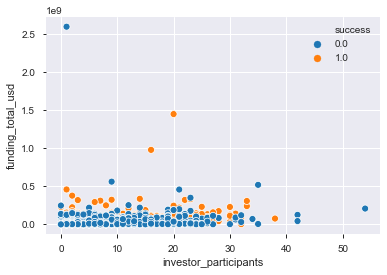

In [60]:
sns.scatterplot(x="investor_participants",y="funding_total_usd",hue="success",data=df2)

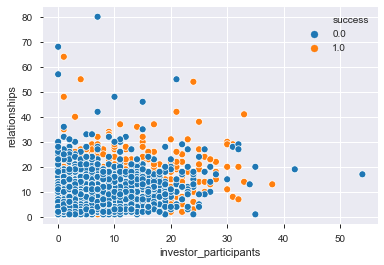

In [61]:
sns.scatterplot(x="investor_participants",y="relationships",hue="success",data=df2)

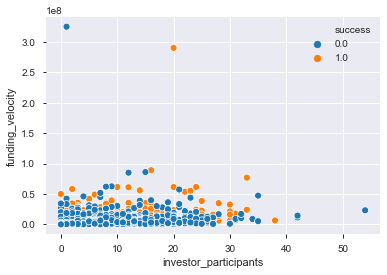

In [62]:
sns.scatterplot(x="investor_participants",y="funding_velocity",hue="success",data=df2)

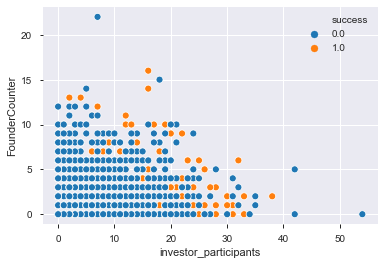

In [63]:
sns.scatterplot(x="investor_participants",y="FounderCounter",hue="success",data=df2)

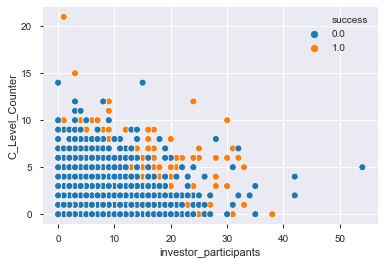

In [64]:
sns.scatterplot(x="investor_participants",y="C_Level_Counter",hue="success",data=df2)

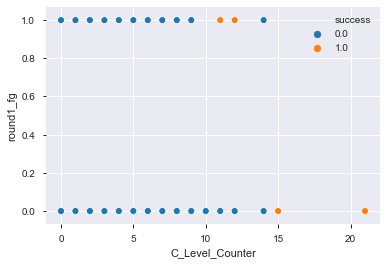

In [66]:
sns.scatterplot(x="C_Level_Counter",y="round1_fg",hue="success",data=df2)

In [61]:
#profile = df2.profile_report(title='Pandas Profiling Report')
#profile.to_file(output_file="fifa_pandas_profiling_perfect.html")

In [232]:
df2.to_csv(r"C:/Users/admin/Desktop/df_perfect1.csv")

In [63]:
#to summarize the content
df2["success"].value_counts()

0.0    3972
1.0    1589
Name: success, dtype: int64

In [64]:
#to summarize as %
df2["success"].value_counts(normalize=True)*100

0.0    71.426003
1.0    28.573997
Name: success, dtype: float64

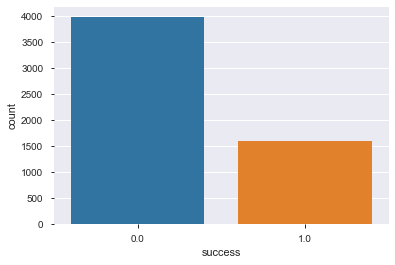

In [65]:
#to visualize the outcome variable
sns.countplot(df2["success"])

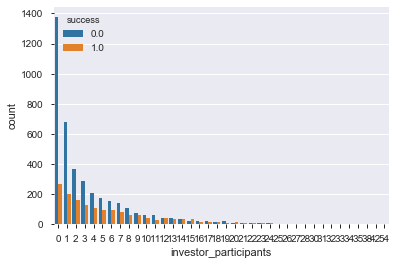

In [66]:
#see the relationship of predictor with the outcome variable
sns.countplot(x="investor_participants",hue="success",data=df2)

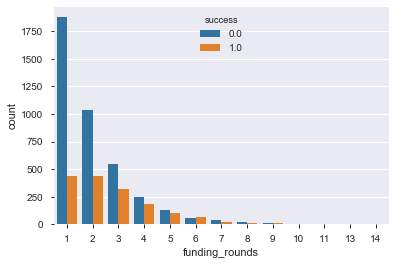

In [67]:
sns.countplot(x="funding_rounds",hue="success",data=df2)

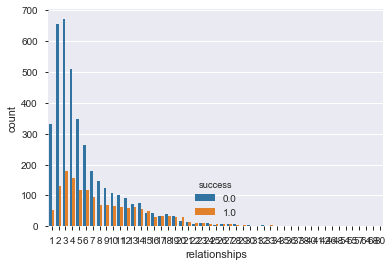

In [68]:
sns.countplot(x="relationships",hue="success",data=df2)

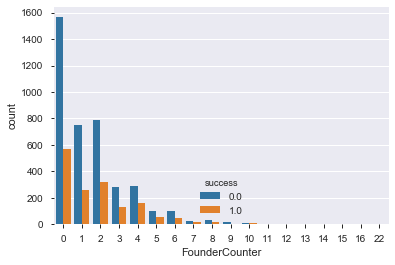

In [69]:
sns.countplot(x="FounderCounter",hue="success",data=df2)

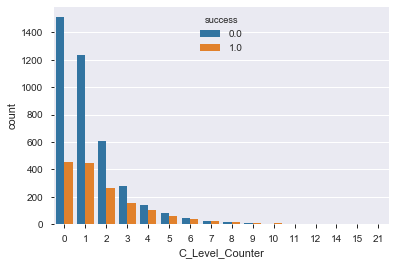

In [70]:
sns.countplot(x="C_Level_Counter",hue="success",data=df2)

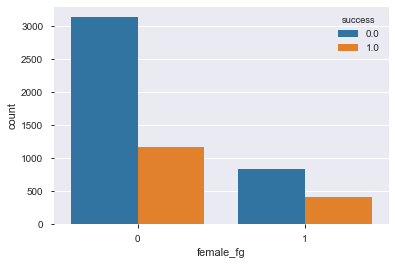

In [72]:
sns.countplot(x="female_fg",hue="success",data=df2)

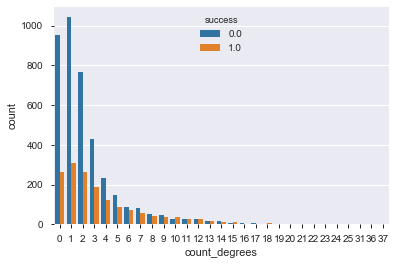

In [73]:
sns.countplot(x="count_degrees",hue="success",data=df2)

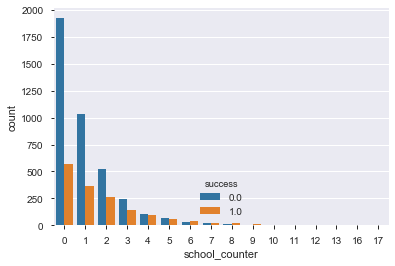

In [74]:
sns.countplot(x="school_counter",hue="success",data=df2)

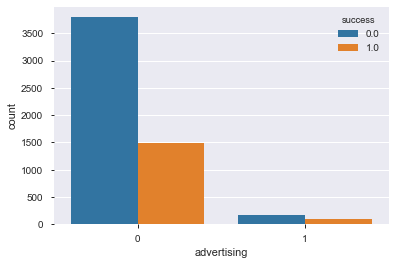

In [75]:
sns.countplot(x="advertising",hue="success",data=df2)

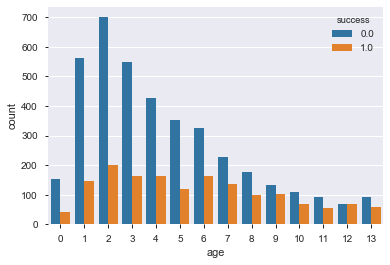

In [76]:
sns.countplot(x="age",hue="success",data=df2)

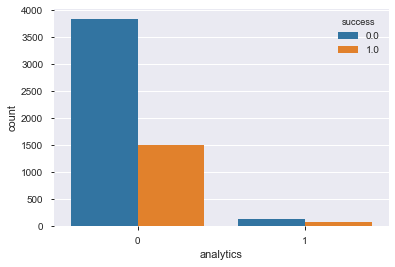

In [77]:
sns.countplot(x="analytics",hue="success",data=df2)

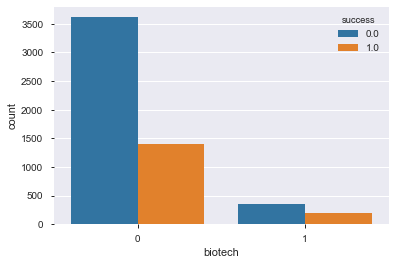

In [78]:
sns.countplot(x="biotech",hue="success",data=df2)

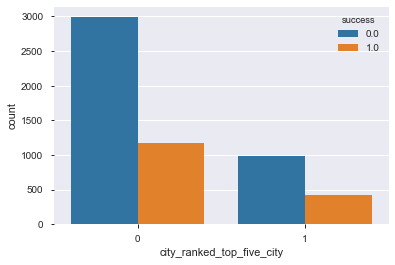

In [79]:
sns.countplot(x="city_ranked_top_five_city",hue="success",data=df2)

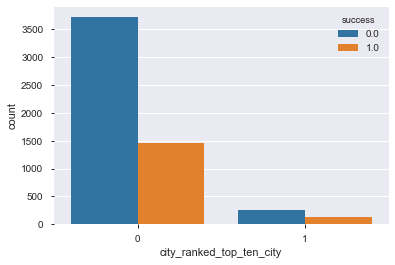

In [80]:
sns.countplot(x="city_ranked_top_ten_city",hue="success",data=df2)

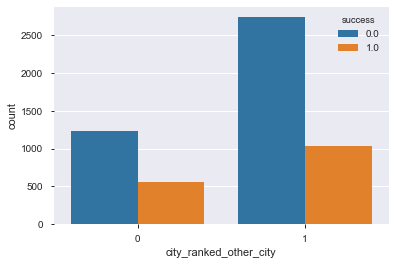

In [81]:
sns.countplot(x="city_ranked_other_city",hue="success",data=df2)

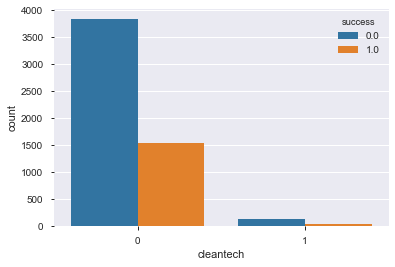

In [82]:
sns.countplot(x="cleantech",hue="success",data=df2)

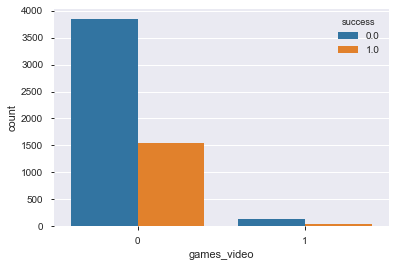

In [86]:
sns.countplot(x="games_video",hue="success",data=df2)

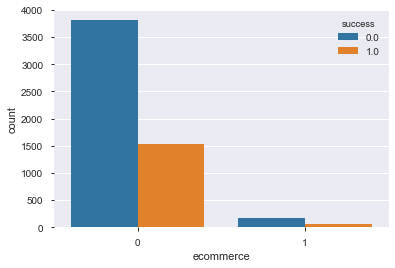

In [85]:
sns.countplot(x="ecommerce",hue="success",data=df2)

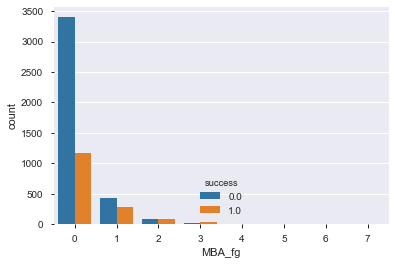

In [87]:
sns.countplot(x="MBA_fg",hue="success",data=df2)

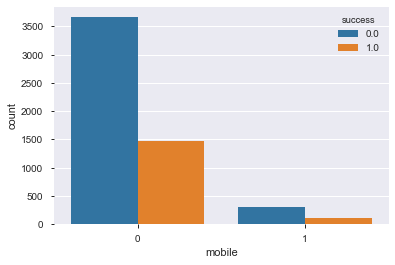

In [88]:
sns.countplot(x="mobile",hue="success",data=df2)

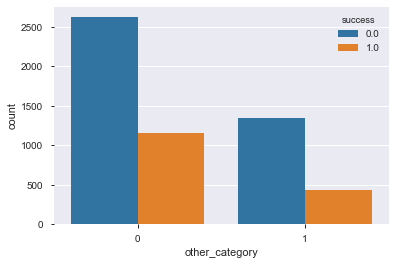

In [89]:
sns.countplot(x="other_category",hue="success",data=df2)

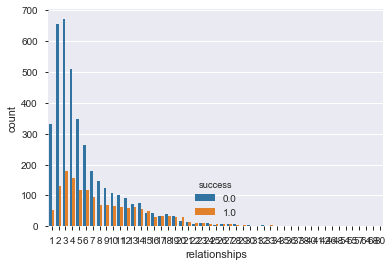

In [90]:
sns.countplot(x="relationships",hue="success",data=df2)

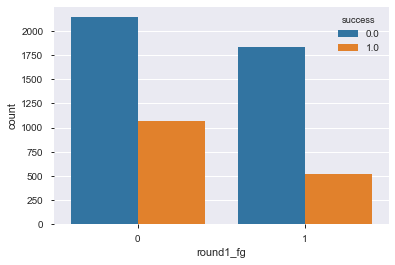

In [91]:
sns.countplot(x="round1_fg",hue="success",data=df2)

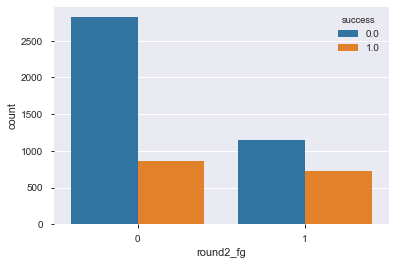

In [92]:
sns.countplot(x="round2_fg",hue="success",data=df2)

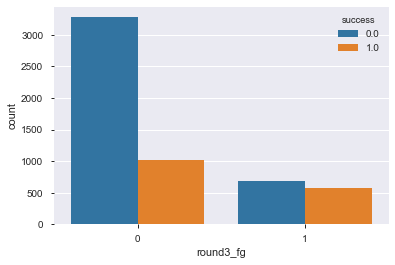

In [93]:
sns.countplot(x="round3_fg",hue="success",data=df2)

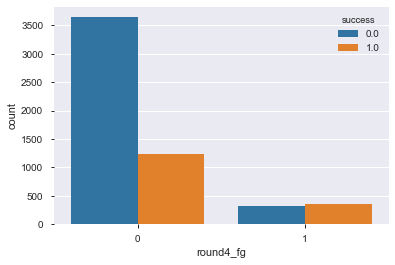

In [94]:
sns.countplot(x="round4_fg",hue="success",data=df2)

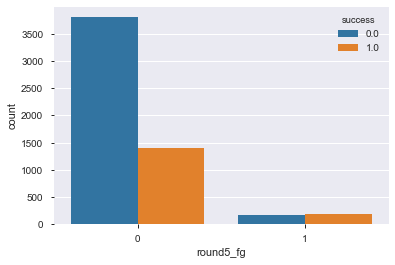

In [95]:
sns.countplot(x="round5_fg",hue="success",data=df2)

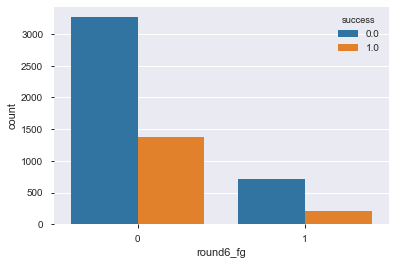

In [96]:
sns.countplot(x="round6_fg",hue="success",data=df2)

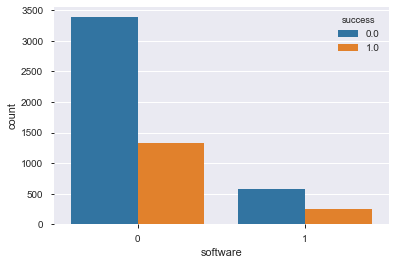

In [97]:
sns.countplot(x="software",hue="success",data=df2)

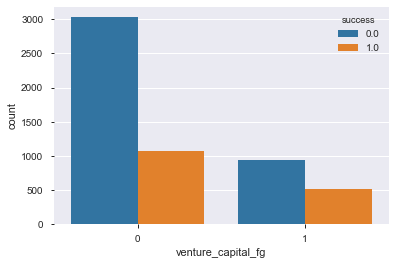

In [98]:
sns.countplot(x="venture_capital_fg",hue="success",data=df2)

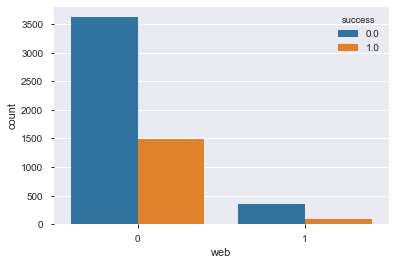

In [99]:
sns.countplot(x="web",hue="success",data=df2)

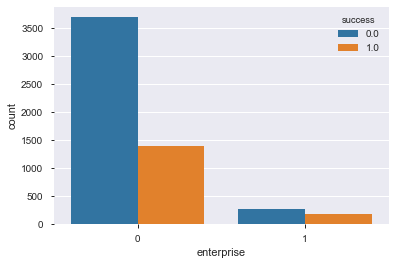

In [100]:
sns.countplot(x="enterprise",hue="success",data=df2)

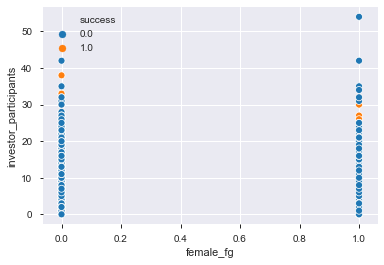

In [113]:
sns.scatterplot(x="female_fg",y="investor_participants",hue="success",data=df2)

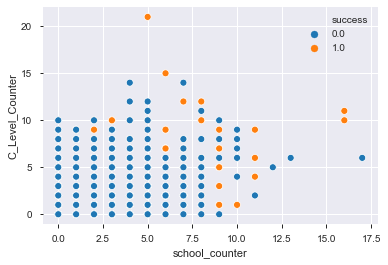

In [103]:
sns.scatterplot(x="school_counter",y="C_Level_Counter",hue="success",data=df2)

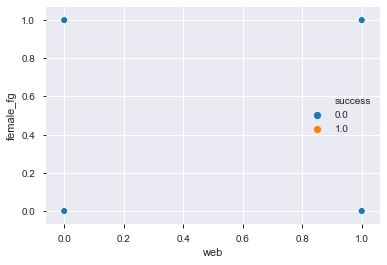

In [121]:
sns.scatterplot(x="web",y="female_fg",hue="success",data=df2)

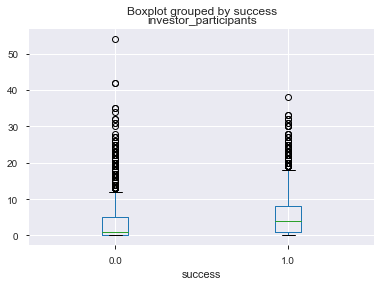

In [106]:
df2.boxplot(column = 'investor_participants',by = 'success') 

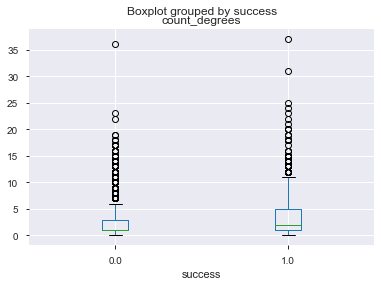

In [107]:
df2.boxplot(column = 'count_degrees',by = 'success') #need to remove zeros 

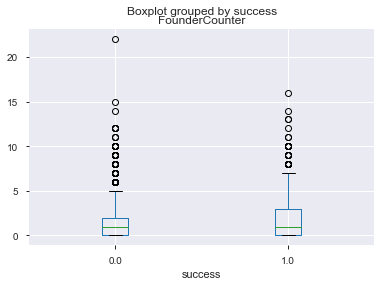

In [108]:
df2.boxplot(column = 'FounderCounter',by = 'success')

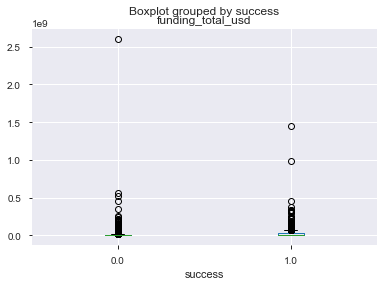

In [109]:
df2.boxplot(column = 'funding_total_usd',by = 'success')

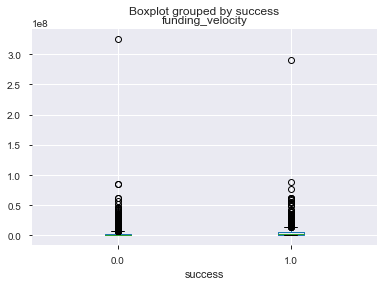

In [110]:
df2.boxplot(column = 'funding_velocity',by = 'success')

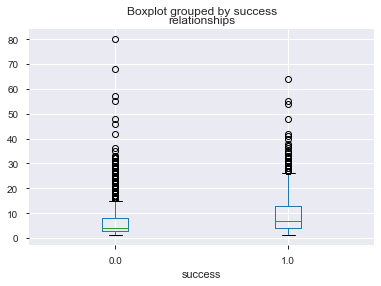

In [111]:
df2.boxplot(column = 'relationships',by = 'success')

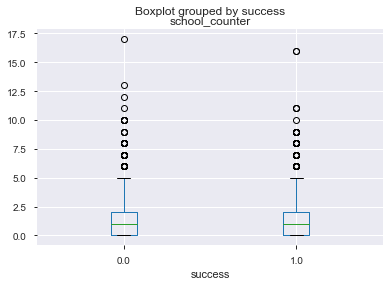

In [112]:
df2.boxplot(column = 'school_counter',by = 'success')#remove zeros

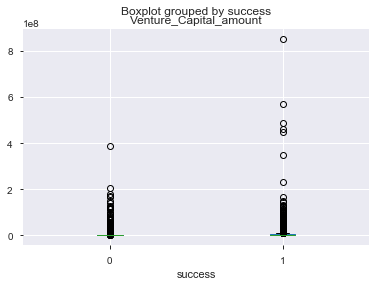

In [24]:
data_final.boxplot(column = 'Venture_Capital_amount',by = 'success')

In [2]:
pip install PyCaret

  Using cached https://files.pythonhosted.org/packages/75/ab/5c6f7eff0177761103a1651390c8ff33140162ab7a6c957b6a85ef7a6016/pycaret-0.0.60-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/73/22/a5297f3a1f92468cc737f8ce7ba6e5f245fcfafeae810ba37bd1039ea01c/DateTime-4.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8e/ce/6ea5683c47b682bffad39ad41d10913141b560b1b875a90dbc6abe3f4fa9/plotly-4.4.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/27/20/1101ac6c1c952aca8e2a7a22810fc707c31b155fe183dd338bfe86741f2c/shap-0.32.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/69/d8/f3103202aeca6fb0d2dbdd3a4ab1a7b86e9ad1d3cf8b23fa46bd466d64ac/spacy-2.2.3-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/64/e2/1610a86284029abcad0ac9bc86cb19f9787fe6448ede467188b2a5121bb4/mlxtend-0.17.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d1/

ERROR: catalogue 1.0.0 has requirement importlib-metadata>=0.20; python_version < "3.8", but you'll have importlib-metadata 0.17 which is incompatible.


In [3]:
import PyCaret

ModuleNotFoundError: No module named 'PyCaret'

In [1]:
# load libraries
import numpy as np
from numpy import arange
import pandas as pd
from pandas import read_table
from pandas import set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [233]:
df = pd.read_csv('C:/Users/admin/Desktop/df_perfect.csv')

In [234]:
df.dtypes

Unnamed: 0                     int64
normalized_name               object
success                        int64
investor_participants          int64
Round_1_amount                 int64
Round_2_amount                 int64
Round_3_amount                 int64
Round_4_amount                 int64
Round_5_amount                 int64
Round_6_amount                 int64
funding_rounds                 int64
funding_total_usd              int64
relationships                  int64
funding_velocity             float64
FounderCounter                 int64
C_Level_Counter                int64
female_fg                      int64
dropout_fg                     int64
count_degrees                  int64
school_counter                 int64
MBA_fg                         int64
round1_fg                      int64
round2_fg                      int64
round3_fg                      int64
round4_fg                      int64
round5_fg                      int64
round6_fg                      int64
v

In [235]:
df.head(2)

,Unnamed: 0,normalized_name,success,investor_participants,Round_1_amount,Round_2_amount,Round_3_amount,Round_4_amount,Round_5_amount,Round_6_amount,...,ecommerce,analytics,games_video,cleantech,other_category,Round1_Missing_fg,Round2_Missing_fg,Round3_Missing_fg,Round4_Missing_fg,Round5_Missing_fg
0,0,wetpaint,1,9,0,5250000,9500000,25000000,0,0,...,0,0,0,0,0,1.0,NaN,NaN,NaN,NaN
1,1,slacker,1,17,0,13500000,40000000,0,9600000,0,...,0,0,0,0,1,1.0,NaN,NaN,1.0,NaN


In [242]:
df = df.fillna(0)

In [244]:
df.to_csv(r"C:/Users/admin/Desktop/df_perfect_final.csv")

In [169]:
profile = dff.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="fifa_pandas_profiling_final.html")

In [245]:
dff = pd.read_csv('C:/Users/admin/Desktop/df_perfect_final.csv')

In [246]:
dff = dff.replace([np.inf, -np.inf], np.nan).dropna(subset=["funding_velocity"], how="all")

In [247]:
array = dff.values

In [249]:
X = array[:,2:43]

In [250]:
Y = array[:,1]

In [251]:
Y=Y.astype('int')

In [252]:
# split off test data
# 1/5 will be used for testing
test_size = 0.2
seed = 42

In [253]:
# select 1/5 randomly and split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= test_size, random_state= seed)

In [254]:
# folding
num_folds = 10

In [255]:
# scoring
scoring = "neg_mean_squared_error"
# function will search for the maximum

In [261]:
# evaluate KNN
model = KNeighborsClassifier()

In [262]:
kfold = KFold(n_splits = num_folds, random_state = seed)

In [263]:
minmaxScaler = preprocessing.MinMaxScaler()

In [264]:
# standardize
minmaxScaler.fit(X_train)
rescaledX_train = minmaxScaler.transform(X_train)

In [265]:
k_values = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21])

In [266]:
param_grid = dict(n_neighbors= k_values)

In [267]:
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring= scoring, cv= kfold)

In [268]:
rescaledX_train

array([[0.26190476, 0.03714294, 0.01777778, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14285714, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.00714287, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [269]:
grid_result = grid.fit(rescaledX_train, Y_train)

In [270]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.281914 using {'n_neighbors': 21}


In [271]:
# all
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" % (mean, stdev, param))

-0.351102 (0.027170) with {'n_neighbors': 1}
-0.319882 (0.024286) with {'n_neighbors': 3}
-0.307307 (0.022857) with {'n_neighbors': 5}
-0.299154 (0.022232) with {'n_neighbors': 7}
-0.291238 (0.017681) with {'n_neighbors': 9}
-0.289140 (0.020517) with {'n_neighbors': 11}
-0.286345 (0.012728) with {'n_neighbors': 13}
-0.285875 (0.014539) with {'n_neighbors': 15}
-0.283779 (0.017569) with {'n_neighbors': 17}
-0.282150 (0.015837) with {'n_neighbors': 19}
-0.281914 (0.017572) with {'n_neighbors': 21}


Text(0, 0.5, 'Error')

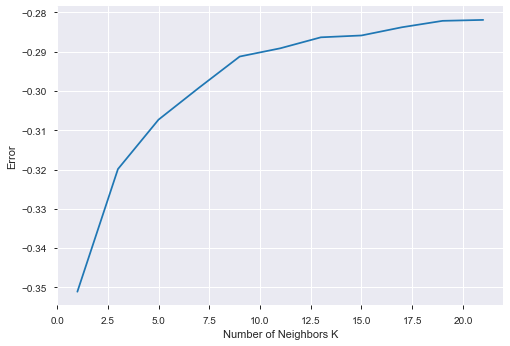

In [272]:
# plot
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Error")

In [273]:
X_test_min_max = minmaxScaler.transform(X_test)
X_test_min_max

array([[0.07142857, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00314286, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.07142857, 0.0124286 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.07142857, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0952381 , 0.        , 0.02844444, ..., 0.        , 0.        ,
        0.        ],
       [0.11904762, 0.04285724, 0.01777778, ..., 0.        , 0.        ,
        0.        ]])

In [274]:
neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(rescaledX_train, Y_train)
pred = neigh.predict(X_test_min_max)
accuracy_score(Y_test, pred)

0.6927374301675978

In [275]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [276]:
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test, pred))

[[695  43]
 [287  49]]
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       738
           1       0.53      0.15      0.23       336

    accuracy                           0.69      1074
   macro avg       0.62      0.54      0.52      1074
weighted avg       0.65      0.69      0.63      1074



In [144]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [145]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]
lr_probs = neigh.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

In [146]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.546


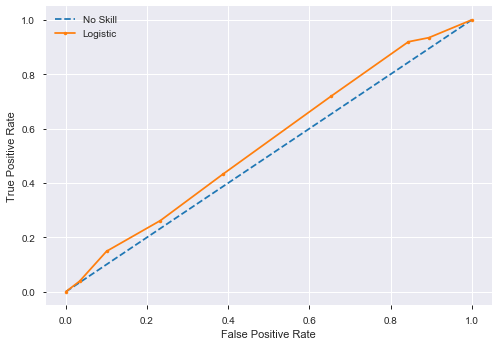

In [148]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()